In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
df = pd.read_csv("compression_sr_results.csv", sep=';', skipinitialspace=True)
print(df)

      model  quality  metric  supersampled       bpp   psnr_rgb   psnr_y  \
0   bicubic        0    none          True  6.000000  38.930600  40.3197   
1   mbt2018        4     mse         False  0.237063  34.770700  36.6957   
2   mbt2018        4  msssim         False  0.235131  33.886300  35.5944   
3   mbt2018        6     mse         False  0.548190  37.668900  39.7326   
4   mbt2018        6  msssim         False  0.505472  35.837800  37.5315   
5   mbt2018        8     mse         False  1.159731  41.685600  43.9544   
6   mbt2018        8  msssim         False  0.970991  38.881900  40.5737   
7   mbt2018        4     mse          True  0.046154  29.549900  31.2033   
8   mbt2018        4  msssim          True  0.044890  29.016900  30.5737   
9   mbt2018        6     mse          True  0.101558  30.535600  32.1893   
10  mbt2018        6  msssim          True  0.087479  29.851700  31.3928   
11  mbt2018        8     mse          True  0.207964  31.597100  33.2381   
12  mbt2018 

/var/folders/8b/ts5jgnwn5dj05thcj8wzsl4h0000gn/T/ipykernel_11414/3535204896.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data=df[df['model'] == model][df['metric'] == metric][df['supersampled'] == supersampled],


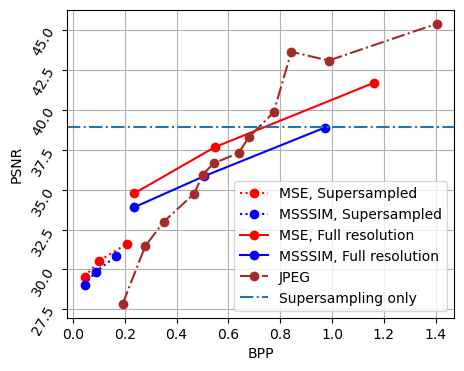

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(5,4))
model="mbt2018"
criterion = 'psnr_rgb'
for supersampled in [True, False]:
    for metric in ["mse", "msssim"]:
        line, = ax.plot(
            'bpp',
            criterion,
            data=df[df['model'] == model][df['metric'] == metric][df['supersampled'] == supersampled],
            label=metric.upper() + ", " + ("Supersampled" if supersampled else "Full resolution"), linestyle=(':' if supersampled else '-'),
            marker='o',
            color = ("red" if metric == "mse" else "blue")
        )
# for bpp, msssim, quality in zip(df['bpp'], df['msssim'], df['quality']):
#     ax.annotate('%s' % quality, xy=(bpp, msssim), xytext=(-12,-3), textcoords='offset points')

line, = ax.plot(
    'bpp',
    criterion,
    data=df[df['model'] == 'jpeg'],
    label='JPEG', linestyle='-.',
    marker='o',
    color = "brown"
)

plt.axhline(y=df[criterion][0], linestyle='-.', label='Supersampling only')
ax.set_xlabel('BPP')
plt.yticks(rotation=60)
ax.set_ylabel('PSNR')
ax.legend(bbox_to_anchor=(1,0), loc="lower right")
ax.grid(True)

# plt.savefig('/Users/clemens/Documents/Bachelor Thesis/ba-thesis/graphics/results_compression_and_sr_ms-ssim.pdf')
plt.show()

In [6]:
# plt.savefig('results_mbt_msssim.pdf')